***Lab 3***

In [48]:
#Import tools
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from scipy.optimize import minimize, least_squares, newton, approx_fprime

    0. Generate data

In [49]:
alpha = np.random.uniform()
beta = np.random.uniform()
epsilon = 0.001
inf = float("inf")
x_data = np.linspace(0, 1, 101, endpoint=True)
delta = np.random.normal(size=101)
guess = [0.5, 0.5]

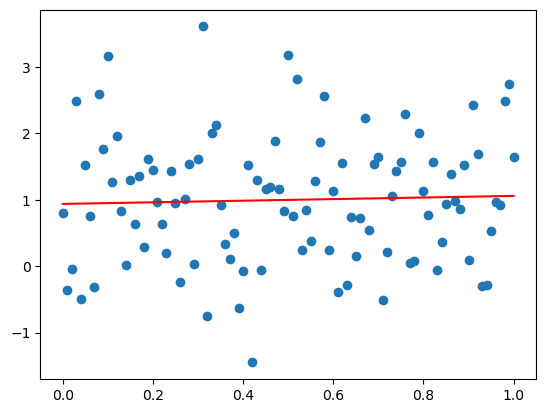

In [50]:
x = np.arange(0, 101) / 100
y = alpha * x + beta + np.random.normal(0, 1, size=x.shape)

plt.scatter(x, y)
A = np.vstack([x, np.ones(len(x))]).T
a_sqr, b_sqr = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, a_sqr*x+b_sqr, color='r')

    1. Create functions of methods

    1.0. Using in methods functions

In [51]:
def loss_for_linear_function(a_, b_):
  return np.sum(np.power(a_*x+b_ - y, 2))

def loss_for_linear_function_for_scipy_lm(ab):
  return ab[0]*x+ab[1] - y


def loss_for_linear_function_for_scipy_newton(ab):

  return np.sum(np.power(ab[0]*x+ab[1] - y, 2))


def loss_for_rational_function(a_, b_):
  return np.sum(np.power(a_/(1+x*b_) - y, 2))

def loss_for_rational_function_for_scipy(ab):
  return ab[0]/(1+x*ab[1]) - y

def loss_for_rational_function_for_scipy_newton(ab):
  return np.sum(np.power(ab[0]/(1+x*ab[1]) - y, 2))

In [52]:
def linear_aprox(x_k, a, b):
    return a*x_k + b

def rational_aprox(x_k, a, b):
    return a/(1+b*x_k)

linear_aprox_v = np.vectorize(linear_aprox, excluded=['a', 'b'])
rational_aprox_v = np.vectorize(rational_aprox, excluded=['a', 'b'])

def least_squares_linear(params):
    a, b = params
    y_hat = linear_aprox_v(x, a, b)
    errors = (y_hat - y) ** 2
    return np.sum(errors)

def least_squares_rational(params):
    a, b = params
    y_hat = rational_aprox_v(x, a, b)
    errors = (y_hat - y)**2
    return np.sum(errors)

    1.1. Gradient descent method

In [53]:
def linear(x, a, b):
    return a * x + b

def rational(x, a, b):
    return a / (1 + b * x)

def loss_for_linear_function(a_, b_):
  return np.sum(np.power(a_*x+b_ - y, 2))

def line_grad(ab):
    first = np.sum(2 * x * (ab[0] * x + ab[1] - y))
    second = np.sum(2 * (ab[0] * x + ab[1] - y))
    return np.array([first, second])

def rational_grad(ab):
    first = np.sum(- (2 * (-ab[0] + ab[1] * x * y + y)) / ((ab[1] * x + 1)**2))
    second = np.sum(- (2 * ab[0] * x * (ab[0] - y * (ab[1] * x + 1))) / ((ab[1] * x + 1)**3))
    return np.array([first, second])

def bar_bor(gradient, last, cur):
    grad_dif = gradient(cur) - gradient(last)
    top = np.abs((cur-last).dot(grad_dif))
    bottom = np.linalg.norm(grad_dif)**2
    return top/bottom

def gradient_descent(gradient, start=guess, learn_rate=0.001, max_iter=10000, tolerance=epsilon):
    minimum = np.array(start)
    beta = learn_rate
    for i in range(max_iter):
        diff = -beta * gradient(minimum)
        if np.all(np.abs(diff) <= tolerance):
            break
        last_minimum = np.copy(minimum)
        minimum += diff
        beta = bar_bor(gradient, last_minimum, minimum)
    return minimum, i, 2*i

    1.1.1. For linear function

Linear approximation
Optimal 'a': 0.12054471487215385
Optimal 'b': 0.9385907040060696
Function evaluations: 14
Number of iterations: 7
Loss: 93.5573661189205


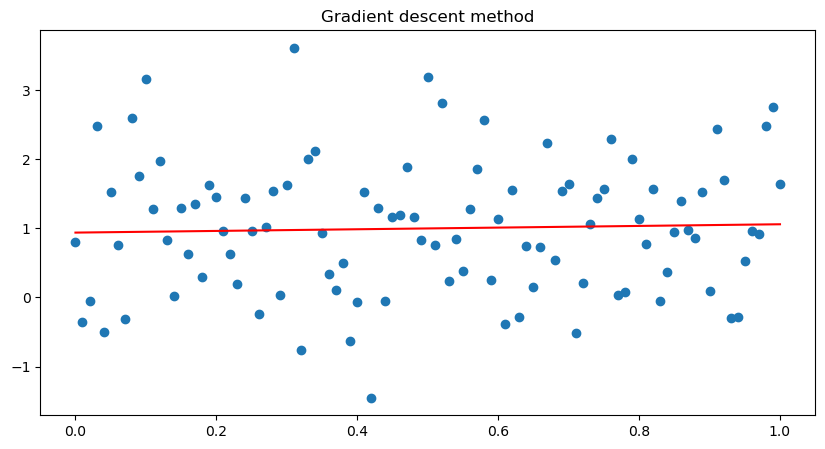

In [54]:
func, grad = linear, line_grad
grad_res, grad_iter, grad_nfev = gradient_descent(grad)
a_found, b_found  = grad_res[0], grad_res[1]
y_hat = linear_aprox_v(x, *[a_found, b_found])

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.title('Gradient descent method')

print('Linear approximation')
print("Optimal 'a':", a_found)
print("Optimal 'b':", b_found)
print("Function evaluations:", grad_nfev)
print("Number of iterations:", grad_iter)
print(f"Loss: {least_squares_linear([a_found, b_found])}")

    1.1.2. For rational function

Rational approximation
Optimal 'a': 0.9330931255334532
Optimal 'b': -0.1304338580588176
Function evaluations: 30
Number of iterations: 15
Loss: 93.54218309577534


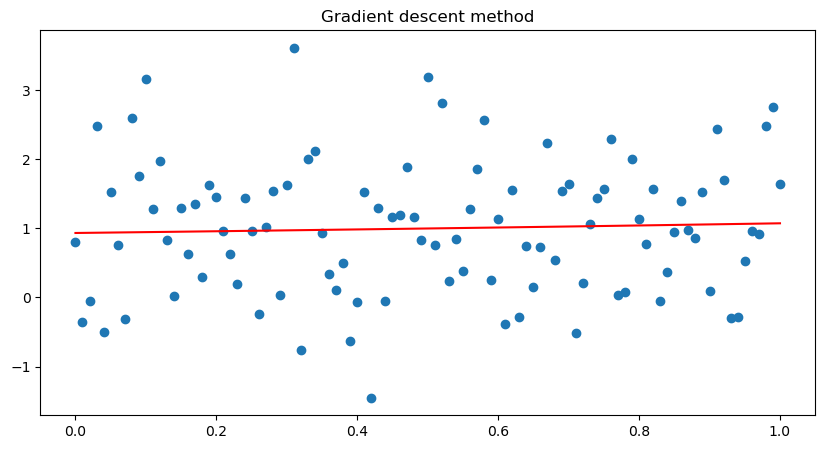

In [55]:
func, grad = rational, rational_grad
grad_res, grad_iter, grad_nfev = gradient_descent(grad)
a_found, b_found  = grad_res[0], grad_res[1]
y_hat = rational_aprox_v(x, *[a_found, b_found])

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.title('Gradient descent method')

print('Rational approximation')
print("Optimal 'a':", a_found)
print("Optimal 'b':", b_found)
print("Function evaluations:", grad_nfev)
print("Number of iterations:", grad_iter)
print(f"Loss: {least_squares_rational([a_found, b_found])}")

    1.2. Conjugate Gradient Descent

    1.2.1. For linear function

Linear approximation
Optimal 'a': 0.1205447252087567
Optimal 'b': 0.9385906798410277
Function evaluations: 15
Number of iterations: 2
Loss: 93.55736611892054


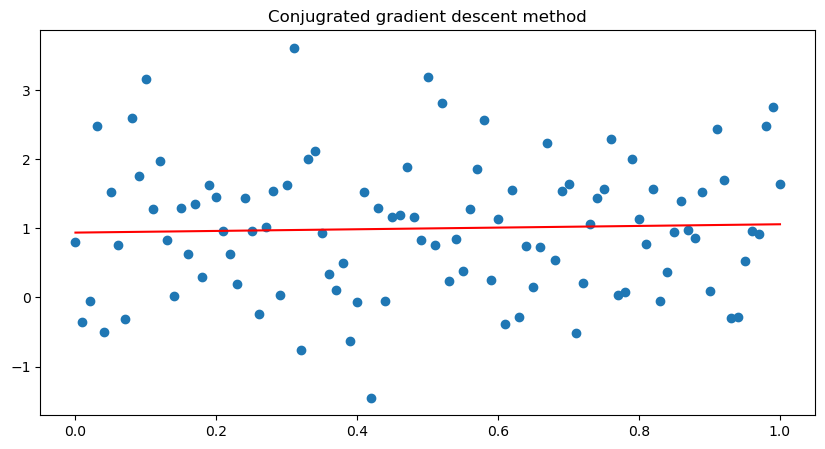

In [56]:
cg_res = minimize(loss_for_linear_function_for_scipy_newton, guess, method="CG", tol=epsilon)
a_found, b_found  = cg_res.x[0], cg_res.x[1]
y_hat = linear_aprox_v(x, *[a_found, b_found])

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.title('Conjugrated gradient descent method')

print('Linear approximation')
print("Optimal 'a':", a_found)
print("Optimal 'b':", b_found)
print("Function evaluations:", cg_res.nfev)
print("Number of iterations:",  cg_res.nit)
print(f"Loss: {least_squares_linear([a_found, b_found])}")

    1.2.2. For rational function

Rational approximation
Optimal 'a': 0.9338648329881972
Optimal 'b': -0.12704347761148496
Function evaluations: 66
Number of iterations: 10
Loss: 93.54194141222536


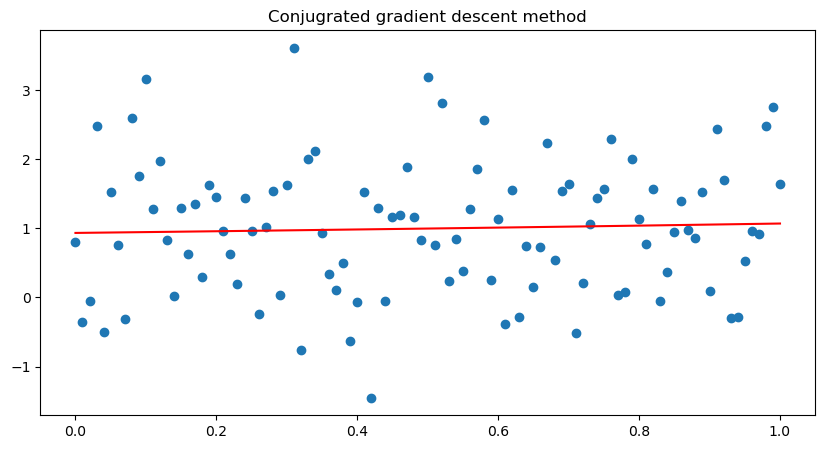

In [57]:
cg_res = minimize(loss_for_rational_function_for_scipy_newton, guess, method="CG", tol=epsilon)
a_found, b_found  = cg_res.x[0], cg_res.x[1]
y_hat = rational_aprox_v(x, *[a_found, b_found])

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.title('Conjugrated gradient descent method')

print('Rational approximation')
print("Optimal 'a':", a_found)
print("Optimal 'b':", b_found)
print("Function evaluations:", cg_res.nfev)
print("Number of iterations:",  cg_res.nit)
print(f"Loss: {least_squares_rational([a_found, b_found])}")

    1.3. Newton's method

In [58]:
def d_linear(wb):
    w, b = wb
    return np.array([np.sum(2 * x * (b + w * x - y)), np.sum(2 * (b + w * x - y))])

def hess_lin(wb):
    w, b = wb
    hess = np.ones([2,2])
    hess[0,0] = np.sum(2 * x**2)
    hess[0,1] = np.sum(2 * x)
    hess[1,0] = np.sum(2 * x)
    hess[1,1] = (2)
    return hess
def newton_method(f, x0, hess, jac, e=0.001):
  newton = minimize(f, x0, jac=jac, hess=hess, method='Newton-CG', tol=0.001)
  a, b = newton.x
  n_it = newton.nit
  n_fev = newton.nfev
  n_jev = newton.njev
  return a, b, n_it, n_fev, n_jev

    1.3.1. For linear function

Linear approximation
Optimal 'a': 0.12199008564545778
Optimal 'b': 0.9378296237346193
Function evaluations: 23
Iterations: 9
Loss: 93.55738420270661


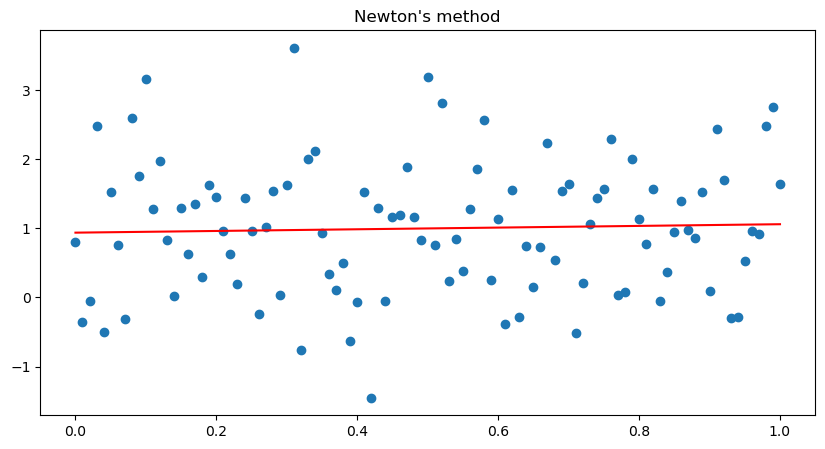

In [59]:
a_found, b_found, n_it, n_fev, n_jev = newton_method(f=least_squares_linear, x0=[0.5, 0.5], hess=hess_lin, jac=d_linear)
y_hat = linear_aprox_v(x, *[a_found, b_found])

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.title("Newton's method")

print('Linear approximation')
print("Optimal 'a':", a_found)
print("Optimal 'b':", b_found)
print("Function evaluations:", n_ev)
print("Iterations:", n_it)
print(f"Loss: {least_squares_linear([a_found, b_found])}")

    1.3.2. For rational function

Rational approximation
Optimal 'a': 0.9305172700206943
Optimal 'b': -0.13234894553302257
Function evaluations: 9
Iterations: 8
Loss: 93.54225138578445


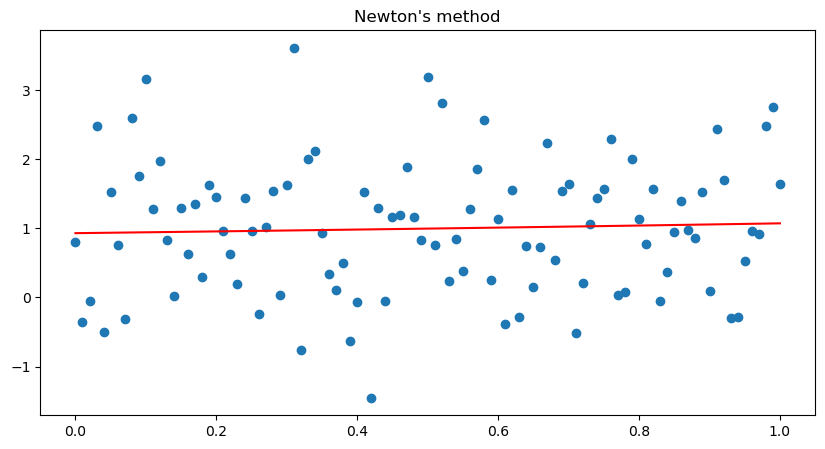

In [60]:
jac = lambda x_: approx_fprime(x_, least_squares_rational, epsilon=epsilon)
newton_res = minimize(least_squares_rational, [0.5, 0.5], method="Newton-CG", jac=jac, tol=epsilon)

a_found, b_found  = newton_res.x[0], newton_res.x[1]
y_hat = rational_aprox_v(x, *[a_found, b_found])
newton_nit, newton_nfev = newton_res.nit, newton_res.nfev

a_found, b_found = newton_res.x
y_hat = rational_aprox_v(x, *[a_found, b_found])

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.title("Newton's method")

print('Rational approximation')
print("Optimal 'a':", a_found)
print("Optimal 'b':", b_found)
print("Function evaluations:", newton_nfev)
print("Iterations:", newton_nit)

print(f"Loss: {least_squares_rational([a_found, b_found])}")

    1.4. Levenberg-Marquardt method

In [61]:
def lm(f, e=0.001):
  lev_mar_res = least_squares(f, [0.5, 0.5], method="lm", ftol=e)
  return *lev_mar_res.x, lev_mar_res.nfev, lev_mar_res.njev

    1.4.1. For linear function

Linear approximation
Optimal 'a': 0.12054467422452686
Optimal 'b': 0.9385907242748629
Function evaluations: 7
Iterations: 7
Loss: 93.55736611892051


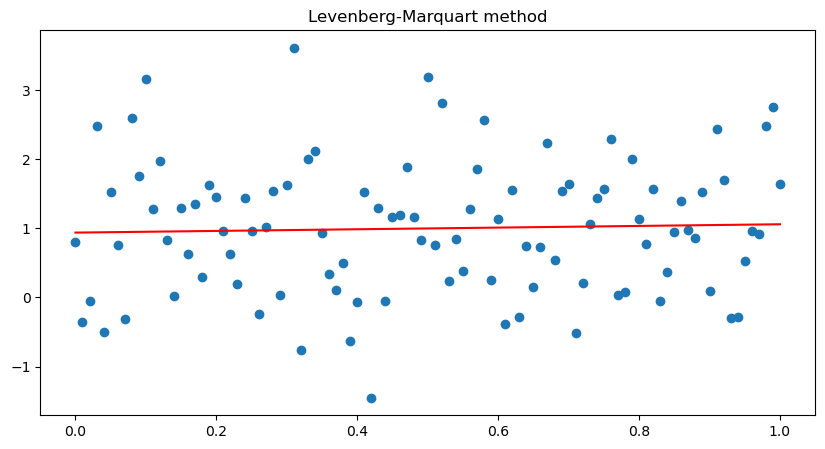

In [62]:
a_found, b_found, n_ev, n_jev = lm(loss_for_linear_function_for_scipy_lm)
y_hat = linear_aprox_v(x, *[a_found, b_found])

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.title('Levenberg-Marquart method')

print('Linear approximation')
print("Optimal 'a':", a_found)
print("Optimal 'b':", b_found)
print("Function evaluations:", n_ev)
print("Iterations:", n_ev)
print(f"Loss: {least_squares_linear([a_found, b_found])}")

    1.4.2. For rational function

Rational approximation
Optimal 'a': 0.9320177472077875
Optimal 'b': -0.13068126272239264
Function evaluations: 17
Iterations: 17
Loss: 93.54207447590011


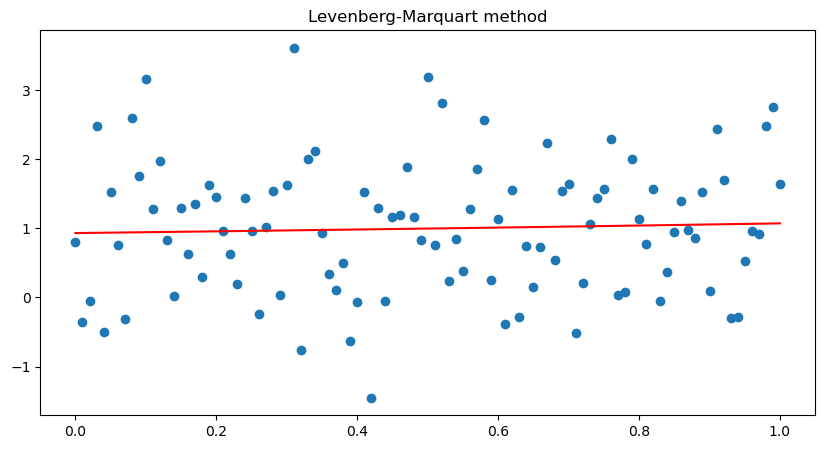

In [63]:
a_found, b_found, n_ev, n_jev = lm(loss_for_rational_function_for_scipy)
y_hat = rational_aprox_v(x, *[a_found, b_found])

# plot lines
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.title('Levenberg-Marquart method')

print('Rational approximation')
print("Optimal 'a':", a_found)
print("Optimal 'b':", b_found)
print("Function evaluations:", n_ev)
print("Iterations:", n_ev)
print(f"Loss: {least_squares_rational([a_found, b_found])}")

    2. Comparison of methods

    2.1. For linear function

Gradient descent method:  0.12054471487215385 0.9385907040060696
Conjugated gradient method:  0.1205447252087567 0.9385906798410277
Newton's method:  0.12199008564545778 0.9378296237346193
Levenberg-Marquart method:  0.12054467422452686 0.9385907242748629


Text(0.5, 1.0, 'Linear approximation')

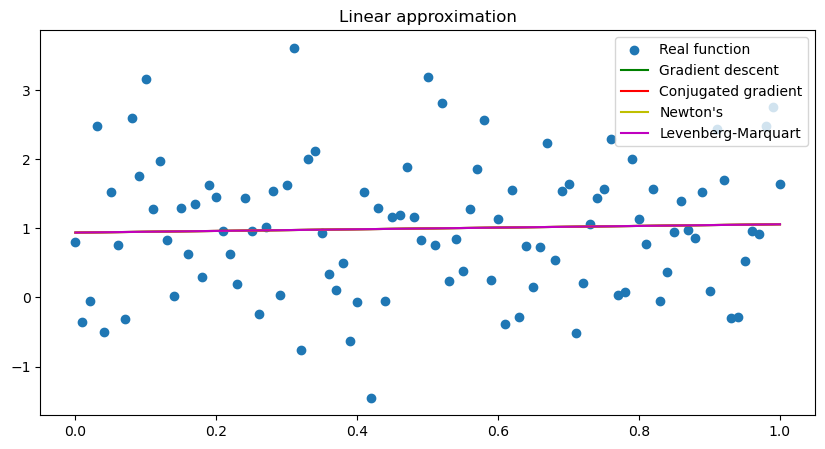

In [64]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Real function')

func, grad = linear, line_grad
grad_res, grad_iter, grad_nfev = gradient_descent(grad)
a_found, b_found  = grad_res[0], grad_res[1]
print("Gradient descent method: ",a_found, b_found)

y_hat = linear_aprox_v(x, *[a_found, b_found])

plt.plot(x, y_hat, label='Gradient descent', color='g')

cg_res = minimize(loss_for_linear_function_for_scipy_newton, guess, method="CG", tol=epsilon)
a_found, b_found  = cg_res.x[0], cg_res.x[1]
print("Conjugated gradient method: ",a_found, b_found)

y_hat = linear_aprox_v(x, *[a_found, b_found])

plt.plot(x, y_hat, label='Conjugated gradient', color='r')

a_found, b_found, n_it, n_fev, n_jev = newton_method(f=least_squares_linear, x0=[0.5, 0.5], hess=hess_lin, jac=d_linear)
print("Newton's method: ",a_found, b_found)

y_hat = linear_aprox_v(x, *[a_found, b_found])

plt.plot(x, y_hat, label="Newton's", color='y')

a_found, b_found, n_ev, n_jev = lm(loss_for_linear_function_for_scipy_lm)
print("Levenberg-Marquart method: ",a_found, b_found)

y_hat = linear_aprox_v(x, *[a_found, b_found])
plt.plot(x, y_hat, label='Levenberg-Marquart', color='m')

plt.legend()
plt.title('Linear approximation')

    2.2. For rational function

Gradient descent method:  0.9330931255334532 -0.1304338580588176
Conjugated gradient method:  0.9338648329881972 -0.12704347761148496
Newton's method:  0.9305172700206943 -0.13234894553302257
Levenberg-Marquart method:  0.9320177472077875 -0.13068126272239264


Text(0.5, 1.0, 'Rational approximation')

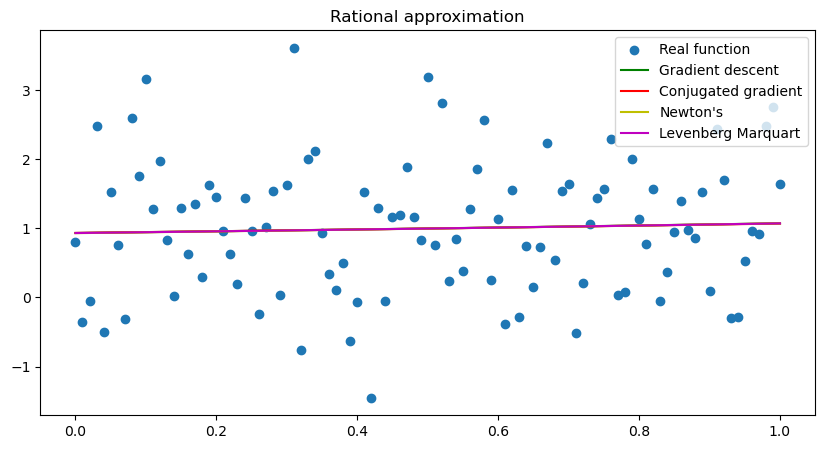

In [67]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Real function')

func, grad = rational, rational_grad
grad_res, grad_iter, grad_nfev = gradient_descent(grad)
a_found, b_found  = grad_res[0], grad_res[1]
print("Gradient descent method: ",a_found, b_found)

y_hat = rational_aprox_v(x, *[a_found, b_found])

plt.plot(x, y_hat, label='Gradient descent', color='g')

cg_res = minimize(loss_for_rational_function_for_scipy_newton, guess, method="CG", tol=epsilon)
a_found, b_found  = cg_res.x[0], cg_res.x[1]
print("Conjugated gradient method: ",a_found, b_found)

y_hat = rational_aprox_v(x, *[a_found, b_found])

plt.plot(x, y_hat, label='Conjugated gradient', color='r')

jac = lambda x_: approx_fprime(x_, least_squares_rational, epsilon=epsilon)
newton_res = minimize(least_squares_rational, [0.5, 0.5], method="Newton-CG", jac=jac, tol=epsilon)
a_found, b_found  = newton_res.x[0], newton_res.x[1]
y_hat = rational_aprox_v(x, *[a_found, b_found])
newton_nit, newton_nfev = newton_res.nit, newton_res.nfev
a_found, b_found = newton_res.x
print("Newton's method: ",a_found, b_found)

y_hat = rational_aprox_v(x, *[a_found, b_found])

plt.plot(x, y_hat, label="Newton's", color='y')

a_found, b_found, n_ev, n_jev = lm(loss_for_rational_function_for_scipy)
print("Levenberg-Marquart method: ",a_found, b_found)

y_hat = rational_aprox_v(x, *[a_found, b_found])

plt.plot(x, y_hat, label='Levenberg Marquart', color='m')

plt.legend()
plt.title('Rational approximation')